In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
plate = pd.read_excel("220620_cgre_bradford.xlsx", skiprows=35, index_col="Unnamed: 1").iloc[:, 1:-1]

In [3]:
plate.loc["A", 1]

1.485

In [4]:
gene_conv_well = {
    '626_3': [["A", 1], ["A", 2]],
    '626_4': [["B", 1], ["B", 2]],
    '900_2': [["A", 3], ["A", 4]],
    '900_3': [["B", 3], ["B", 4]],
    '1414_3': [["A", 5], ["A", 6]],
    '1414_5': [["B", 5], ["B", 6]],
    '1338_1': [["A", 7], ["A", 8]],
    '1338_2': [["B", 7], ["B", 8]],
    '4111_1': [["A", 9], ["A", 10]],
    '4111_2': [["B", 9], ["B", 10]],
    '9708_1': [["A", 11], ["A", 12]],
    '9708_2': [["B", 12], ["B", 12]],
    '132_1': [["C", 1], ["C", 2]],
    '132_2': [["D", 1], ["D", 2]],
    '911_3': [["C", 3], ["C", 4]],
    '911_4': [["D", 3], ["D", 4]],
    '2880_2': [["C", 5], ["C", 6]],
    '2880_3': [["D", 5], ["D", 6]],
    '3224_1': [["C", 7], ["C", 8]],
    '3224_2': [["D", 7], ["D", 8]],
    '121_2': [["C", 9], ["C", 10]],
    '121_3': [["D", 9], ["D", 10]],
    '13_2': [["C", 11], ["C", 12]],
    '13_3': [["D", 12], ["D", 12]],
    '83_2': [["E", 1], ["E", 2]],
    '83_3': [["F", 1], ["F", 2]],
    '567_2': [["E", 3], ["E", 4]],
    '567_3': [["F", 3], ["F", 4]],
    '985_1': [["E", 5], ["F", 5]],
    '985_3': [["E", 6], ["F", 6]],
    '575_2': [["E", 7], ["F", 8]],
    '575_3': [["F", 7], ["E", 8]],
    'WT_1': [["E", 9], ["E", 10]],
    'WT_2': [["F", 9], ["F", 10]],
    'Blank': [["E", 11], ["E", 12], ["F", 12], ["F", 12]],
}

In [5]:
calibration_conc = np.array([2000, 1500, 1000, 750, 500, 250, 125, 25, 0]) 
calibration_ext_values = plate.to_numpy()[-2:, :-3].mean(axis=0) 

In [6]:
plate.to_numpy()[-2:, :-3].mean(axis=0) 

array([2.635 , 2.0435, 1.4975, 1.193 , 0.8455, 0.504 , 0.3235, 0.1525,
       0.121 ])

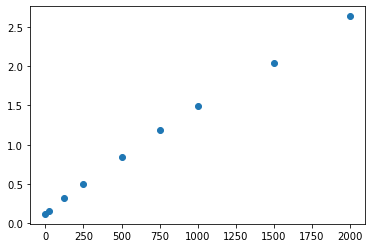

In [23]:
plt.scatter(calibration_conc, calibration_ext_values.reshape((-1, 1)))

In [34]:
model = LinearRegression().fit(calibration_ext_values.reshape((-1, 1)), calibration_conc)

In [37]:
r_sq = model.score(calibration_ext_values.reshape((-1, 1)), calibration_conc)
print(f"coefficient of determination: {r_sq}")

coefficient of determination: 0.996638635145406


In [38]:
pred_conc = model.predict(plate.to_numpy()[:-2].flatten().reshape((-1, 1))).reshape((plate.shape[0]-2, plate.shape[1])) * 40 / 1000

In [39]:
df_pred_conc = pd.DataFrame(pred_conc, columns = list(range(1, 13)), index = plate.index[:-2])

In [40]:
gene_conc = {}
for gene, wells in gene_conv_well.items():
    
    concentrations = []
    print(gene)
    for well in wells:
        print(well)
        concentrations.append(df_pred_conc.loc[well[0], well[1]])
                              
    gene_conc[gene] = round(sum(concentrations) / len(concentrations), 2)

626_3
['A', 1]
['A', 2]
626_4
['B', 1]
['B', 2]
900_2
['A', 3]
['A', 4]
900_3
['B', 3]
['B', 4]
1414_3
['A', 5]
['A', 6]
1414_5
['B', 5]
['B', 6]
1338_1
['A', 7]
['A', 8]
1338_2
['B', 7]
['B', 8]
4111_1
['A', 9]
['A', 10]
4111_2
['B', 9]
['B', 10]
9708_1
['A', 11]
['A', 12]
9708_2
['B', 12]
['B', 12]
132_1
['C', 1]
['C', 2]
132_2
['D', 1]
['D', 2]
911_3
['C', 3]
['C', 4]
911_4
['D', 3]
['D', 4]
2880_2
['C', 5]
['C', 6]
2880_3
['D', 5]
['D', 6]
3224_1
['C', 7]
['C', 8]
3224_2
['D', 7]
['D', 8]
121_2
['C', 9]
['C', 10]
121_3
['D', 9]
['D', 10]
13_2
['C', 11]
['C', 12]
13_3
['D', 12]
['D', 12]
83_2
['E', 1]
['E', 2]
83_3
['F', 1]
['F', 2]
567_2
['E', 3]
['E', 4]
567_3
['F', 3]
['F', 4]
985_1
['E', 5]
['F', 5]
985_3
['E', 6]
['F', 6]
575_2
['E', 7]
['F', 8]
575_3
['F', 7]
['E', 8]
WT_1
['E', 9]
['E', 10]
WT_2
['F', 9]
['F', 10]
Blank
['E', 11]
['E', 12]
['F', 12]
['F', 12]


In [41]:
gene_conc

{'626_3': 41.07,
 '626_4': 18.47,
 '900_2': 45.65,
 '900_3': 35.62,
 '1414_3': 18.93,
 '1414_5': 8.02,
 '1338_1': 4.39,
 '1338_2': 2.85,
 '4111_1': 4.9,
 '4111_2': 2.41,
 '9708_1': 2.01,
 '9708_2': 19.66,
 '132_1': 2.11,
 '132_2': 10.55,
 '911_3': 30.22,
 '911_4': 20.85,
 '2880_2': 10.77,
 '2880_3': 17.41,
 '3224_1': 8.9,
 '3224_2': 8.9,
 '121_2': 35.43,
 '121_3': 26.79,
 '13_2': 36.73,
 '13_3': 8.76,
 '83_2': 34.94,
 '83_3': 25.13,
 '567_2': 20.65,
 '567_3': 19.39,
 '985_1': 2.26,
 '985_3': 1.71,
 '575_2': 2.9,
 '575_3': 2.77,
 'WT_1': 6.64,
 'WT_2': 12.77,
 'Blank': -0.9}